# The Plane Shooting Problem (Dynamic Programming)

## Introduction

The nation is at war. The enemy send out a squadron of $n$ planes to attack our troops from various angles. You have a very precise anti-aircraft launcher that will be used to shoot enemy planes. If the launcher is aimed directly at an enemy plane, it's guaranteed to destroy the plane. Unfortunately, your launcher is ponderous to reposition. Namely, you can only move 1 degree per minute. Then 1 plane enter your shoot range per minute. Once they go passed your shoot range, they are gone and you can't shoot them again. You are tasked to destroy the first plane, and then destroy as many plane as possible. 

## Examples

The plane is coming at [50,49,60,48,54,55,56,57,58] angles for each minute. You shoot down the first plane at 50 degree and you can either statys at 50 degree, move to 51 degree, or move to 49 degree. The optimal solution would be shooting down 6 aircraft: [50,54,55,56,57,58].

## Analysis

Notice this problem can be solved by brute force method. For each position, we can either statys at $k$ degree, move to $k+1$ degree, or move to $k-1$ degree. So we can just try all possible possibilities and see which possibility shoot the most plane. We therefore demonstrate a brute force approach:


In [2]:
import pandas as pd
import numpy as np
    
# Some testing data
a_1 = [50,49,60,48,54,55,56,57,58]
a_2 = [50,49,60,48,54,55,56,47,46]
a_3 = [50,80,81,82,83]
a_4 = [50,51,49,48]
a_5= [50,51,50,51,50,55,56,57,58,59,60]
a_6 = [50,49,48,50,50,50]


def brute_force(angles, start_angle):
    
    if len(angles) == 0:
        return 0
    x = brute_force(angles[1:], start_angle+1)
    y = brute_force(angles[1:], start_angle-1)
    z = brute_force(angles[1:], start_angle)
    if angles[0] == start_angle:
        return max(x + 1, y + 1, z + 1)
    else:
        return max(x, y, z)
    
print(brute_force(a_1, a_1[0]))
print(brute_force(a_2, a_2[0]))
print(brute_force(a_5, a_5[0]))

6
5
8


Then we draw the brute force tree for analysis:

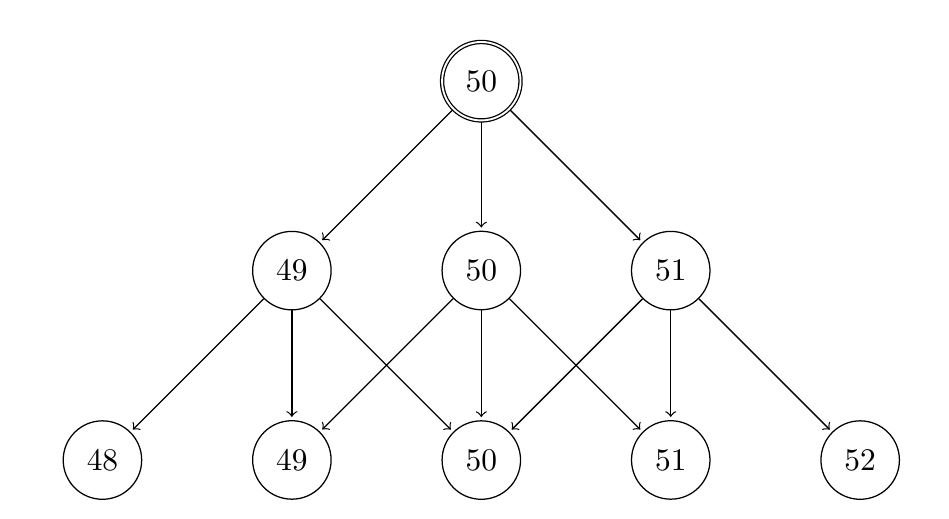

In [6]:
from IPython.display import Image
Image("pic.JPG", height = 600, width = 600)

We somehow spotted this pattern: there are so many interconnected edges, which means we can maybe find a way to efficiently use the past information. For example, if we want to know what's the maximum number of planes we can shoot down if we end in 49, there are only two ways to 49: [50,49,49], [50,50,49], but in the process we would have already know which ways shoot down more planes, and we can just take the maximum of them. Therefore we demonstrate the dynamic programming approach:

In [13]:
angles = a_6
start_angle = angles[0]

df = pd.DataFrame(index = angles, columns = range(start_angle - len(angles),start_angle + len(angles)+1), data = 0)
def dynamic_programming(df, print_output = False):
    df.iloc[0][start_angle] = 1
    columns = list(df.columns)
    rows = list(df.index)
    
    for row in range(0, len(df)-1):
        # record the degree of the upcoming plane, which is in next row
        plane_degree = rows[row+1]
        
        for col in range(1, len(df.iloc[0])-1):
            # if the current column has data, the cannon can
            # go down left, go down, or go down right
            if df.iloc[row].iloc[col] != 0:
                data = df.iloc[row].iloc[col]
                
                # go down left
                left_column_degree = columns[col-1]
                # if our move results in a new destoryed plane: 
                if left_column_degree == plane_degree:
                    df.iloc[row+1].iloc[col-1] = max(df.iloc[row+1].iloc[col-1], data + 1)
                else:
                    df.iloc[row+1].iloc[col-1] = max(df.iloc[row+1].iloc[col-1], data)
                    
                # go down
                down_column_degree = columns[col]
                # if our move results in a new destoryed plane: 
                if down_column_degree == plane_degree:
                    df.iloc[row+1].iloc[col] = max(df.iloc[row+1].iloc[col], data + 1)
                else:
                    df.iloc[row+1].iloc[col] = max(df.iloc[row+1].iloc[col], data)
                    
                # go down right
                right_column_degree = columns[col+1]
                # if our move results in a new destoryed plane: 
                if right_column_degree == plane_degree:
                    df.iloc[row+1].iloc[col+1] = max(df.iloc[row+1].iloc[col+1], data + 1)
                else:
                    df.iloc[row+1].iloc[col+1] = max(df.iloc[row+1].iloc[col+1], data)
        
        if print_output == True:
            print(df)
            print("===============================================================")
    
    return max(df.iloc[-1])
    


dp_output = dynamic_programming(df, print_output = True)
print("\ninput data is ", angles)
print("dynamic programming can shoot down", dp_output, "planes")
print("brute force method can shoot down", brute_force(angles, start_angle), "planes")

    44  45  46  47  48  49  50  51  52  53  54  55  56
50   0   0   0   0   0   0   1   0   0   0   0   0   0
49   0   0   0   0   0   2   1   1   0   0   0   0   0
48   0   0   0   0   0   0   0   0   0   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
    44  45  46  47  48  49  50  51  52  53  54  55  56
50   0   0   0   0   0   0   1   0   0   0   0   0   0
49   0   0   0   0   0   2   1   1   0   0   0   0   0
48   0   0   0   0   3   2   2   1   1   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
50   0   0   0   0   0   0   0   0   0   0   0   0   0
    44  45  46  47  48  49  50  51  52  53  54  55  56
50   0   0   0   0   0   0   1   0   0   0   0   0   0
49   0   0   0   0   0   2   1   1   0   0   0   0   0
48   0   0   0   0   3   2   2   1   1   0   0   0   0
50   0   0

Now we can test different data by generating some random list and run the program to see when does brute force become really slow.

In [19]:
t = np.random.choice(10, 14) + 50
t
# (2, 5) + 10 would out put size 5, origin 10, random integer from (10-2, 10+2) 
# at size 14 is where you can see brute force takes more than an instant
# notice 3^14 = 4782969

array([52, 55, 52, 55, 50, 56, 53, 53, 57, 59, 55, 53, 51, 56])

In [18]:
angles = t
start_angle = angles[0]
df = pd.DataFrame(index = angles, columns = range(start_angle - len(angles),start_angle + len(angles)+1), data = 0)
dp_ouput = dynamic_programming(df)
print("\ninput data is ", angles)
print("dynamic programming can shoot down", dp_ouput, "planes")
print("brute force method can shoot down", brute_force(angles, start_angle), "planes")


input data is  [55 56 52 53 56 57 54 59 58 53 53 55 52 56]
dynamic programming can shoot down 8 planes
brute force method can shoot down 8 planes
